In [9]:
from sklearn.metrics import precision_score, recall_score

In [22]:
recall_score([1,1,1,1,1], [0,1,0,0,0], average='binary')

0.2

# Precision Recall Curve 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_true = np.random.choice([0, 1], size=100, p=[0.6, 0.4])  # Ground truth labels (0 = cat, 1 = dog)
y_scores = np.random.rand(100)  # Predicted probabilities for the positive class (dog)
thresholds = np.sort(np.unique(y_scores))

In [10]:
y_true

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [11]:
y_scores

array([0.03142919, 0.63641041, 0.31435598, 0.50857069, 0.90756647,
       0.24929223, 0.41038292, 0.75555114, 0.22879817, 0.07697991,
       0.28975145, 0.16122129, 0.92969765, 0.80812038, 0.63340376,
       0.87146059, 0.80367208, 0.18657006, 0.892559  , 0.53934224,
       0.80744016, 0.8960913 , 0.31800347, 0.11005192, 0.22793516,
       0.42710779, 0.81801477, 0.86073058, 0.00695213, 0.5107473 ,
       0.417411  , 0.22210781, 0.11986537, 0.33761517, 0.9429097 ,
       0.32320293, 0.51879062, 0.70301896, 0.3636296 , 0.97178208,
       0.96244729, 0.2517823 , 0.49724851, 0.30087831, 0.28484049,
       0.03688695, 0.60956433, 0.50267902, 0.05147875, 0.27864646,
       0.90826589, 0.23956189, 0.14489487, 0.48945276, 0.98565045,
       0.24205527, 0.67213555, 0.76161962, 0.23763754, 0.72821635,
       0.36778313, 0.63230583, 0.63352971, 0.53577468, 0.09028977,
       0.8353025 , 0.32078006, 0.18651851, 0.04077514, 0.59089294,
       0.67756436, 0.01658783, 0.51209306, 0.22649578, 0.64517

In [12]:
thresholds

array([0.00695213, 0.01658783, 0.03142919, 0.03688695, 0.04077514,
       0.05147875, 0.07697991, 0.09028977, 0.09310277, 0.11005192,
       0.11347352, 0.11986537, 0.13752094, 0.14489487, 0.16122129,
       0.17436643, 0.18651851, 0.18657006, 0.22210781, 0.22649578,
       0.22793516, 0.22879817, 0.23763754, 0.23956189, 0.24185229,
       0.24205527, 0.24929223, 0.2517823 , 0.25794163, 0.27864646,
       0.28484049, 0.28975145, 0.30087831, 0.31435598, 0.31800347,
       0.32078006, 0.32320293, 0.33761517, 0.33902979, 0.34106635,
       0.34920957, 0.3636296 , 0.36778313, 0.38673535, 0.41038292,
       0.417411  , 0.42710779, 0.48945276, 0.49724851, 0.50267902,
       0.50857069, 0.5107473 , 0.51209306, 0.51879062, 0.52965058,
       0.53577468, 0.53934224, 0.55520081, 0.59089294, 0.60956433,
       0.63230583, 0.63310146, 0.63340376, 0.63352971, 0.63641041,
       0.64517279, 0.65998405, 0.67213555, 0.67756436, 0.69093774,
       0.70301896, 0.72595568, 0.72821635, 0.75555114, 0.76161

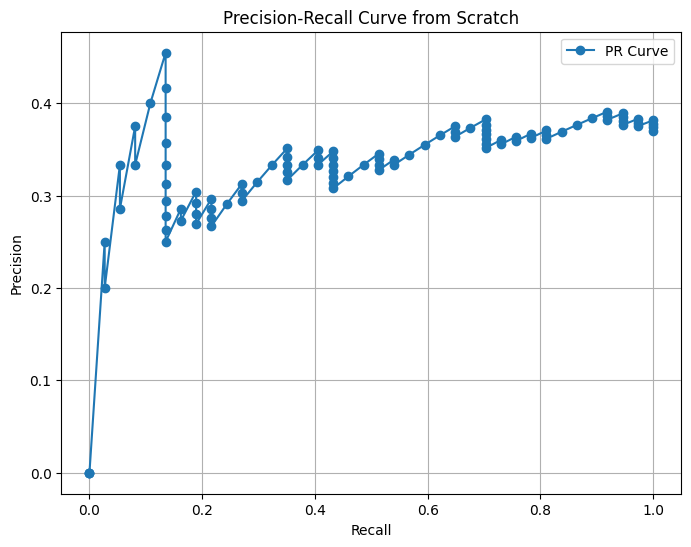

In [9]:
# Generate simulated data
np.random.seed(42)
y_true = np.random.choice([0, 1], size=100, p=[0.6, 0.4])  # Ground truth labels (0 = cat, 1 = dog)
y_scores = np.random.rand(100)  # Predicted probabilities for the positive class (dog)

# Function to calculate precision and recall
def calculate_precision_recall(y_true, y_scores, thresholds):
    precision = []
    recall = []
    
    for threshold in thresholds:
        # Predicted labels based on threshold
        y_pred = (y_scores >= threshold).astype(int)
        
        # Calculate TP, FP, FN
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        
        # Precision and recall calculations
        prec = tp / (tp + fp) if (tp + fp) > 0 else 0
        rec = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        precision.append(prec)
        recall.append(rec)
    
    return precision, recall

# Define thresholds (unique sorted predicted probabilities)
thresholds = np.sort(np.unique(y_scores))

# Calculate precision and recall for each threshold
precision, recall = calculate_precision_recall(y_true, y_scores, thresholds)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', linestyle='-', label="PR Curve")
plt.title("Precision-Recall Curve from Scratch")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()


In [5]:
precision

[0.37,
 0.37373737373737376,
 0.37755102040816324,
 0.38144329896907214,
 0.375,
 0.37894736842105264,
 0.3829787234042553,
 0.3763440860215054,
 0.3804347826086957,
 0.38461538461538464,
 0.3888888888888889,
 0.38202247191011235,
 0.38636363636363635,
 0.39080459770114945,
 0.38372093023255816,
 0.3764705882352941,
 0.36904761904761907,
 0.3614457831325301,
 0.36585365853658536,
 0.37037037037037035,
 0.3625,
 0.3670886075949367,
 0.358974358974359,
 0.36363636363636365,
 0.35526315789473684,
 0.36,
 0.35135135135135137,
 0.3561643835616438,
 0.3611111111111111,
 0.36619718309859156,
 0.37142857142857144,
 0.37681159420289856,
 0.38235294117647056,
 0.373134328358209,
 0.36363636363636365,
 0.36923076923076925,
 0.375,
 0.36507936507936506,
 0.3548387096774194,
 0.3442622950819672,
 0.3333333333333333,
 0.3389830508474576,
 0.3275862068965517,
 0.3333333333333333,
 0.3392857142857143,
 0.34545454545454546,
 0.3333333333333333,
 0.32075471698113206,
 0.3076923076923077,
 0.313725490196

In [6]:
recall

[1.0,
 1.0,
 1.0,
 1.0,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.918918918918919,
 0.918918918918919,
 0.918918918918919,
 0.8918918918918919,
 0.8648648648648649,
 0.8378378378378378,
 0.8108108108108109,
 0.8108108108108109,
 0.8108108108108109,
 0.7837837837837838,
 0.7837837837837838,
 0.7567567567567568,
 0.7567567567567568,
 0.7297297297297297,
 0.7297297297297297,
 0.7027027027027027,
 0.7027027027027027,
 0.7027027027027027,
 0.7027027027027027,
 0.7027027027027027,
 0.7027027027027027,
 0.7027027027027027,
 0.6756756756756757,
 0.6486486486486487,
 0.6486486486486487,
 0.6486486486486487,
 0.6216216216216216,
 0.5945945945945946,
 0.5675675675675675,
 0.5405405405405406,
 0.5405405405405406,
 0.5135135135135135,
 0.5135135135135135,
 0.5135135135135135,
 0.5135135135135135,
 0.4864864864864865,
 0.4594594594594595,
 0.43243243243243246,
 0.43243243243243246,
 0.43243243243

In [3]:
y_scores

array([0.27431315, 0.89067935, 0.41751182, 0.33384637, 0.72947729,
       0.89666607, 0.53036435, 0.43770138, 0.39175584, 0.0860199 ,
       0.11949787, 0.73481412, 0.75348349, 0.89955457, 0.91190947,
       0.29557287, 0.66568433, 0.89797453, 0.51529381, 0.01511227,
       0.61591382, 0.41611304, 0.03126716, 0.01237235, 0.27229248,
       0.77248289, 0.86443473, 0.47060256, 0.10464927, 0.0825421 ,
       0.10951726, 0.54017983, 0.13512491, 0.4749119 , 0.34126635,
       0.85632153, 0.9121189 , 0.22544234, 0.05165896, 0.76231803,
       0.13602313, 0.52808721, 0.52791523, 0.4268849 , 0.21809027,
       0.98451001, 0.89232455, 0.61994   , 0.25020039, 0.83414486,
       0.22362526, 0.77539412, 0.15246679, 0.44531285, 0.84863868,
       0.10644788, 0.34166589, 0.87474046, 0.06143749, 0.90885904,
       0.44622238, 0.2562171 , 0.83179306, 0.92868172, 0.50348366,
       0.04415281, 0.0315542 , 0.68062167, 0.49480779, 0.29406393,
       0.28449999, 0.66768653, 0.21116719, 0.43579254, 0.93138

In [2]:
y_true

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [1]:
import torch.nn as nn 
import torchvision
import torch 
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
import pathlib 
from tqdm import tqdm 
import torch.optim as optim
from torchvision.models import ResNet50_Weights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from glob import glob 
import os 

In [2]:
class Res_Net(nn.Module):
    def __init__(self,classes):
        super().__init__()
        self.model = torchvision.models.resnet50(weights=ResNet50_Weights.DEFAULT)
        self.model.fc = nn.Linear(self.model.fc.in_features, len(classes))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.model(x)

In [3]:
class BP_Eye_Dataset(Dataset):
    def __init__(self, image_paths, classes, my_transforms):
        self.image_paths = image_paths
        self.classes = classes
        self.my_transforms = my_transforms

        self.idx_to_class = {i:j for i, j in enumerate(self.classes)}
        self.class_to_idx = {value:key for key,value in self.idx_to_class.items()}
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx] 
        label = image_filepath.split('/')[-2]

        image = torchvision.io.read_image(image_filepath)
        
        image = self.my_transforms(image)
        label_final = self.class_to_idx[label]

        return image, label_final

In [4]:
num_epochs = 1
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_path = '/mnt/Enterprise2/shirshak/Glaucoma_Dataset_eyepacs_airogs_lightv2/eyepac-light-v2-512-jpg/train/'
val_path = '/mnt/Enterprise2/shirshak/Glaucoma_Dataset_eyepacs_airogs_lightv2/eyepac-light-v2-512-jpg/validation/'
test_path = '/mnt/Enterprise2/shirshak/Glaucoma_Dataset_eyepacs_airogs_lightv2/eyepac-light-v2-512-jpg/test/'

In [5]:
train_data_paths = glob(train_path + "*/*.jpg")
val_data_paths = glob(val_path + "*/*.jpg")
test_data_paths = glob(test_path + "*/*.jpg")

In [6]:
my_transforms = transforms.Compose([
    transforms.ToPILImage(), 
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.Resize((256,256))
])

In [7]:
train_dataset = BP_Eye_Dataset(train_data_paths, classes = ["NRG", "RG"], my_transforms=my_transforms)

In [10]:
train_dataset[:20]

AttributeError: 'list' object has no attribute 'split'

In [9]:
train_dataset = torchvision.datasets.ImageFolder(train_path, transform=my_transform)
val_dataset = torchvision.datasets.ImageFolder(val_path, transform=my_transform)
test_dataset = torchvision.datasets.ImageFolder(test_path, transform=my_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

NameError: name 'my_transform' is not defined

In [ ]:
model = Res_Net(classes=classes)
model = model.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
def get_needed_metrics(labels, predicted): 
    assert isinstance(labels, list)
    assert isinstance(predicted, list)
    
    accuracy = accuracy_score(labels, predicted)
    precision = precision_score(labels, predicted, zero_division=0.0)
    recall = recall_score(labels, predicted, zero_division=0.0)
    f1 = f1_score(labels, predicted, zero_division=0.0)
    
    return accuracy, precision, recall, f1

In [ ]:
for epoch in range(num_epochs):
        model.train()
        acc_train_epoch, precision_train_epoch, recall_train_epoch, f1_train_epoch  = [], [], [], []
        for inputs, labels in tqdm(train_loader, desc=f'Training Epoch {epoch}/{num_epochs}', unit='batch'):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = nn.Sigmoid()(model(inputs))     
            
            train_loss = loss_func(outputs, labels)
            train_loss.backward()
            optimizer.step()
        
            _, predicted_train = torch.max(outputs, 1)
            

            acc_batch_train, precision_batch_train, recall_batch_train, f1_batch_train = get_needed_metrics(labels.cpu().detach().tolist(), predicted_train.cpu().detach().tolist())
        
            acc_train_epoch.append(acc_batch_train)
            precision_train_epoch.append(precision_batch_train)
            recall_train_epoch.append(recall_batch_train)
            f1_train_epoch.append(f1_batch_train)
        
        # Validating the model
        model.eval()
        acc_val_epoch, precision_val_epoch, recall_val_epoch, f1_val_epoch  = [], [], [], []
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f'Testing {epoch}/{num_epochs}', unit='batch'):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = nn.Sigmoid()(model(inputs))     
                val_loss = loss_func(outputs, labels)
                _, predicted_val = torch.max(outputs, 1)

                acc_batch_val, precision_batch_val, recall_batch_val, f1_batch_val = get_needed_metrics(labels.cpu().detach().tolist(), predicted_val.cpu().detach().tolist())
                
                acc_val_epoch.append(acc_batch_val)
                precision_val_epoch.append(precision_batch_val)
                recall_val_epoch.append(recall_batch_val)
                f1_val_epoch.append(f1_batch_val)

In [ ]:
checkpoint = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': train_loss,
}
torch.save(checkpoint, '/home/shirshak/BPEye_Project_2024/zzz_tests/checkpoint.pth')

# FOR TESTING PURPOSES ONLY

In [1]:
import torch.nn as nn 
import torchvision
import torch 
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
import pathlib 
from tqdm import tqdm 
import torch.optim as optim
from torchvision.models import ResNet50_Weights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
test_path = '/mnt/Enterprise2/shirshak/Glaucoma_Dataset_eyepacs_airogs_lightv2/eyepac-light-v2-512-jpg/test/'
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(), # convert 0-255 to 0-1 and from np to tensors
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

In [3]:
class Res_Net(nn.Module):
    def __init__(self,classes):
        super().__init__()
        self.model = torchvision.models.resnet50(weights=ResNet50_Weights.DEFAULT)
        self.model.fc = nn.Linear(self.model.fc.in_features, len(classes))
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        # print(self.model.fc.in_features)
        return self.model(x)

In [4]:
def get_needed_metrics(labels, predicted): 
    assert isinstance(labels, list)
    assert isinstance(predicted, list)
    
    accuracy = accuracy_score(labels, predicted)
    precision = precision_score(labels, predicted, zero_division=0.0)
    recall = recall_score(labels, predicted, zero_division=0.0)
    f1 = f1_score(labels, predicted, zero_division=0.0)
    
    return accuracy, precision, recall, f1

In [5]:
root=pathlib.Path(test_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [6]:
test_dataset = torchvision.datasets.ImageFolder(test_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [8]:
# loaded_model = Res_Net(classes=classes)
# # checkpoint = torch.load('/home/shirshak/BPEye_Project_2024/zzz_tests/checkpoint.pth')
# loaded_model = loaded_model.to(device)
# loaded_model.load_state_dict(checkpoint['model_state_dict'])
# loaded_optimizer = optim.Adam(loaded_model.parameters(), lr=1e-4)
# loaded_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# train_loss = checkpoint['loss']

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
loaded_model.eval()
acc_test_epoch, precision_test_epoch, recall_test_epoch, f1_test_epoch  = [], [], [], []
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'Testing'):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = nn.Sigmoid()(loaded_model(inputs))     
        val_loss = loss_func(outputs, labels)
        _, predicted_test = torch.max(outputs, 1)

        acc_batch_test, precision_batch_test, recall_batch_test, f1_batch_test = get_needed_metrics(labels.cpu().detach().tolist(), predicted_test.cpu().detach().tolist())
        
        acc_test_epoch.append(acc_batch_test)
        precision_test_epoch.append(precision_batch_test)
        recall_test_epoch.append(recall_batch_test)
        f1_test_epoch.append(f1_batch_test)

In [ ]:
torch.tensor(acc_test_epoch).mean(), torch.tensor(precision_test_epoch).mean(), torch.tensor(recall_test_epoch).mean(), torch.tensor(f1_test_epoch).mean()

In [ ]:
import os
import torchvision
from torchvision.transforms import transforms

In [ ]:
transforms = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(), # convert 0-255 to 0-1 and from np to tensors
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
            transforms.Resize((256,256))
        ])


class ImageFolderWithPaths(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        img, label = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        return (img, label, path)    

In [ ]:
root_dir = "/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_separated_train_test_val/"

In [ ]:
data_train = ImageFolderWithPaths(root=os.path.join(root_dir, "train"), transform=transforms)
data_val = ImageFolderWithPaths(root=os.path.join(root_dir, "val"), transform=transforms)
data_test = ImageFolderWithPaths(root=os.path.join(root_dir, "test"), transform=transforms)

#TODO CHANGE THIS WHEN DOING FULL PIPELINE
data_train = data_train[:20]
data_val = data_val[:20]
data_test = data_test[:20]

In [ ]:
data_train[0]

# Just other zzz tests 

In [9]:
import torch.nn as nn 
import torch 

In [10]:
my_input = torch.tensor([[1.6808e-10, 1.0000e+00],
        [1.0000e+00, 1.6941e-12]])
target = torch.tensor([1, 0])

In [11]:
my_input = torch.tensor([[1.6808e-10, 1.0000e+00],
        [1.0000e+00, 1.6941e-12]])

nn.Softmax()(my_input)


/mnt/Enterprise2/shirshak/miniconda3/envs/BPEye_Project_2024/lib/python3.9/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.2689, 0.7311],
        [0.7311, 0.2689]])

In [57]:
print(my_input.shape)
print(target.shape)
torch.nn.CrossEntropyLoss()(my_input, target)

torch.Size([2, 2])
torch.Size([2])


tensor(0.)

In [56]:
my_input = torch.tensor([[-100, 100],
        [100, -100]], dtype = torch.float32)
target = torch.tensor([1 ,0])

In [46]:
my_input

tensor([[1.6808e-10, 1.0000e+00],
        [1.0000e+00, 1.6941e-12]])

In [44]:
torch.gather(my_input, 1, target.view(-1, 1)).squeeze()

tensor([1., 1.])

In [30]:
my_input2 = torch.gather(my_input, 1, target.view(-1, 1)).squeeze()
my_input2

tensor([1., 1.])

In [ ]:
my_input2 = torch.gather(my_input, 1, target.view(-1, 1)).squeeze()
my_input2

tensor([1., 1.])

In [32]:
my_input2

tensor([1., 1.])

In [31]:
target.float()

tensor([1., 0.])

In [38]:
my_input = torch.tensor([0, 1]).float()

In [40]:
torch.nn.BCELoss()(my_input,my_input)

tensor(0.)

# Data Augmentation Test 

In [69]:
import torch.nn as nn 
import torchvision
import torch 
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pathlib 
from tqdm import tqdm 
import torch.optim as optim
from torchvision.models import ResNet50_Weights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from glob import glob 
import os 
from PIL import Image
import matplotlib.pyplot as plt

In [70]:
test_images = sorted(glob('/mnt/Enterprise2/shirshak/Glaucoma_Dataset_eyepacs_airogs_lightv2/eyepac-light-v2-512-jpg/test/RG/*.jpg'))

In [71]:
test_images[0]

'/mnt/Enterprise2/shirshak/Glaucoma_Dataset_eyepacs_airogs_lightv2/eyepac-light-v2-512-jpg/test/RG/EyePACS-TRAIN-RG-2886.jpg'

In [72]:
my_transforms = transforms.Compose([
    transforms.ToPILImage(), 
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    # transforms.Resize((256,256))
])

In [73]:
image = torchvision.io.read_image(test_images[12])
image.shape

torch.Size([3, 512, 512])

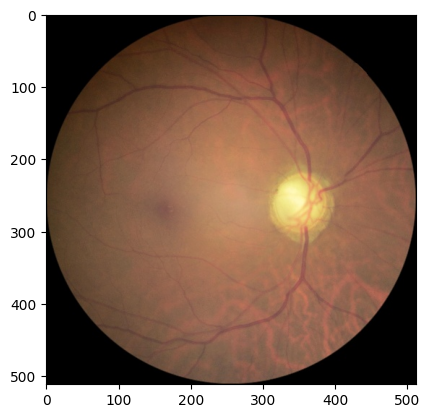

In [74]:
plt.imshow(image.permute(1,2,0))

In [75]:
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, RandomRotation, RandomAffine

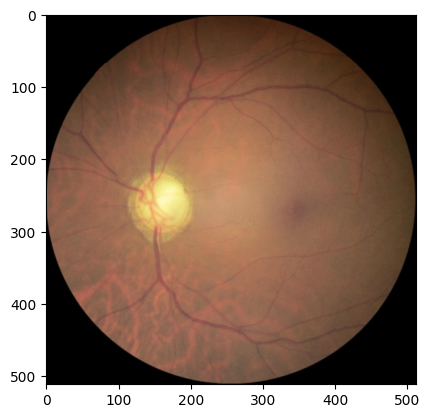

In [76]:
flipped = RandomHorizontalFlip(p=1.0)(image)
plt.imshow(flipped.permute(1,2,0))

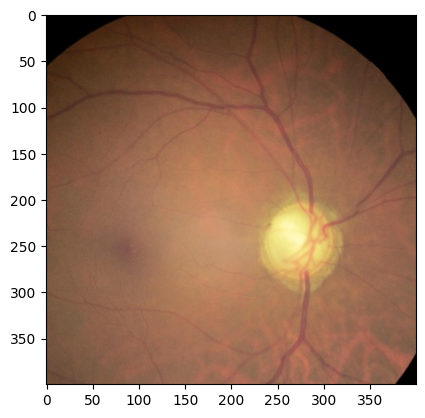

In [77]:
crop = RandomCrop(size=(400, 400))(image)
plt.imshow(crop.permute(1,2,0))

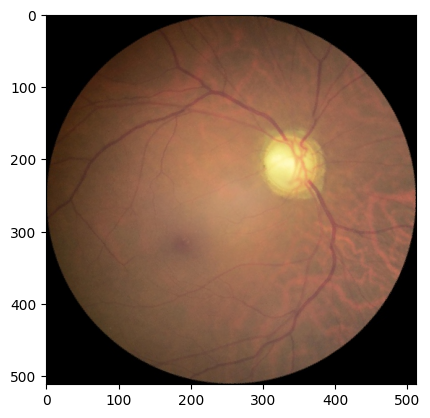

In [78]:
rotate = RandomRotation(degrees=(30, 35))(image) # randomly choose rotation degree from angle -100 (anticlockwise) or 100 (clockwise)
plt.imshow(rotate.permute(1,2,0))

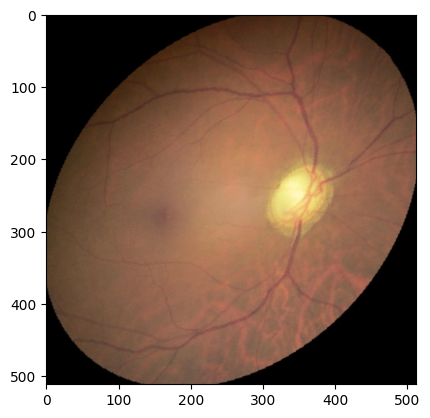

In [79]:
# stretch = random_affine = transforms.RandomAffine(
#     degrees=(-30, 30),  # Rotation range
#     translate=(0.1, 0.1),  # Translation range (as a fraction of total size)
#     scale=(0.8, 1.2),  # Scale range
#     shear=(-10, 10)  # Shear range
# )
stretch  = transforms.RandomAffine(degrees=(-0, 0), translate=(0, 0), scale=(1, 1), shear=(-25, 25, -25, 25))(image)
plt.imshow(stretch.permute(1,2,0))

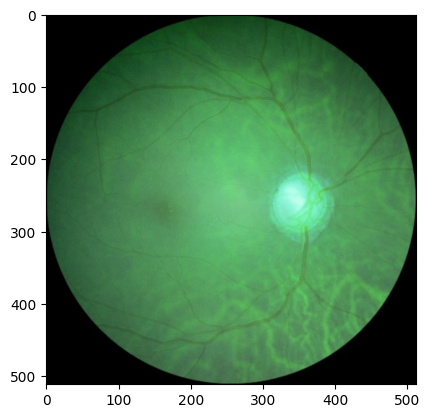

In [80]:
# my_transform = transforms.Compose([
#     transforms.ColorJitter(brightness=(0.5,1.5),contrast=(3),saturation=(0.8,2.1),hue=(-0.01,0.01)),
# ])
my_transform = transforms.Compose([
    # transforms.ColorJitter(brightness=(1.6, 1.6)),
    # transforms.ColorJitter(contrast=(2.6, 2.6)),
    # transforms.ColorJitter(saturation=(2.6, 2.6))
    # transforms.ColorJitter(hue=(-0.5, -0.5)),
    transforms.ColorJitter(hue=(0.3, 0.3)), # Change hue from -0.5 to 0.5  (use -0.5, -0.5 for not randomness)
])
my_img = my_transform(image)
plt.imshow(my_img.permute(1,2,0))

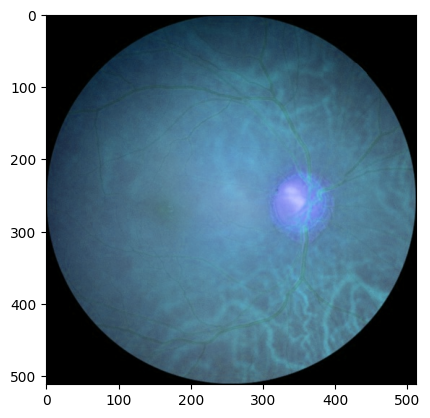

In [81]:
# my_transform = transforms.Compose([
#     transforms.ColorJitter(brightness=(0.5,1.5),contrast=(3),saturation=(0.8,2.1),hue=(-0.01,0.01)),
# ])
my_transform = transforms.Compose([
    # transforms.ColorJitter(brightness=(1.6, 1.6)),
    # transforms.ColorJitter(contrast=(2.6, 2.6)),
    # transforms.ColorJitter(saturation=(2.6, 2.6))
    # transforms.ColorJitter(hue=(-0.5, -0.5)),
    transforms.ColorJitter(hue=(-0.5, -0.5)), # Change hue from -0.5 to 0.5  (use -0.5, -0.5 for not randomness)
])
my_img = my_transform(image)
plt.imshow(my_img.permute(1,2,0))

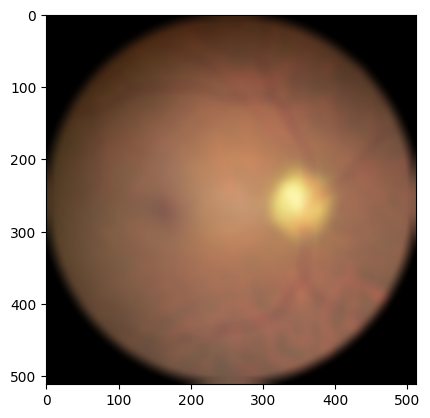

In [82]:
gaussian_blurred = transforms.GaussianBlur(kernel_size=(21, 21), sigma=(9, 9))(image)
plt.imshow(gaussian_blurred.permute(1,2,0))

In [83]:
transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])(image).mean(), transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])(image).std()

(tensor(0.3149), tensor(0.2186))

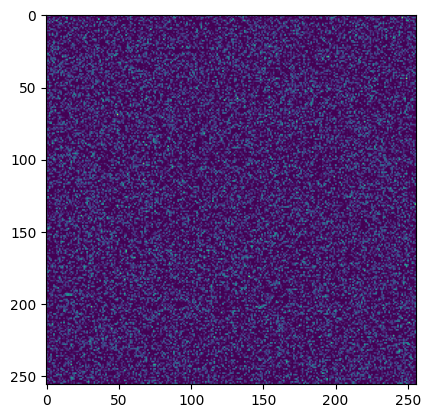

In [84]:
black_image = torch.zeros((256,256))
gaussian_noise_black_image = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(), transforms.v2.GaussianNoise(mean=0, sigma=0.1, clip=True)])(black_image.to(dtype=torch.float32))
plt.imshow(gaussian_noise_black_image.permute(1,2,0))

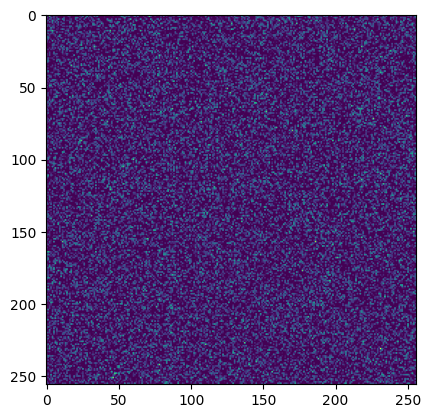

In [85]:
white_image = torch.zeros((256,256)) + 255
gaussian_noise_white_image = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(), transforms.v2.GaussianNoise(mean=0, sigma=0.1, clip=True)])(white_image.to(dtype=torch.float32))
plt.imshow(gaussian_noise_white_image.permute(1,2,0))

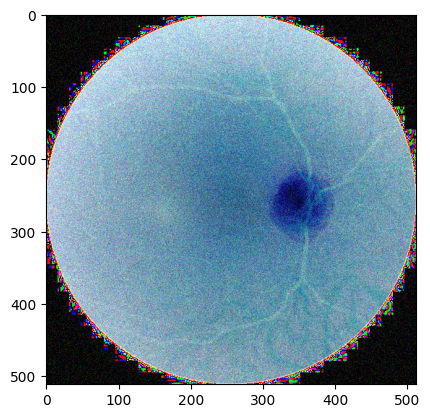

In [104]:
my_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(), 
    transforms.v2.GaussianNoise(mean=0, sigma=0.1, clip=True)])

my_img = my_transform(image.to(dtype=torch.float32))
plt.imshow(my_img.permute(1,2,0))

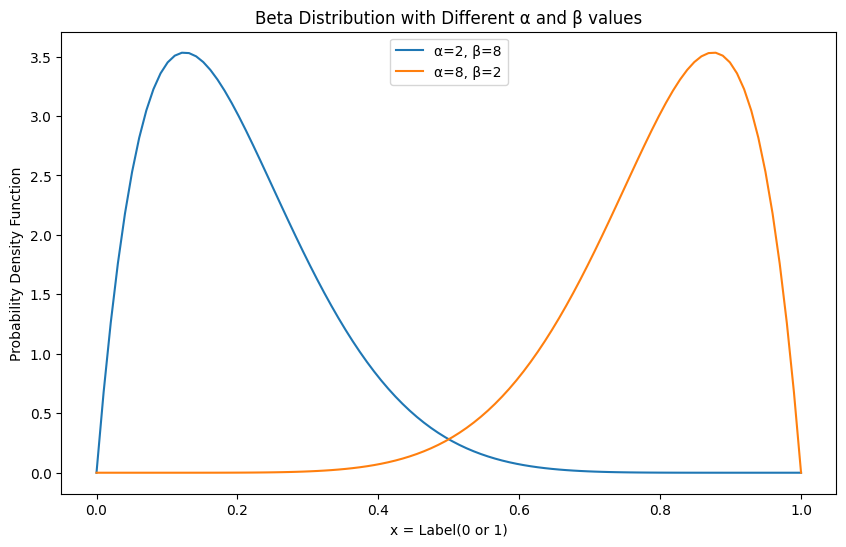

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define alpha and beta value pairs
# alpha_beta_pairs = [(2, 5), (5, 2), (2, 2), (0.5, 0.5), (5, 5)]
alpha_beta_pairs = [(2, 8), (8,2)]


# Set up the x-axis values
x = np.linspace(0, 1, 100)

# Plot each distribution
plt.figure(figsize=(10, 6))
for alpha, beta_val in alpha_beta_pairs:
    y = beta.pdf(x, alpha, beta_val)
    plt.plot(x, y, label=f'α={alpha}, β={beta_val}')

plt.title('Beta Distribution with Different α and β values')
plt.xlabel('x = Label(0 or 1)')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

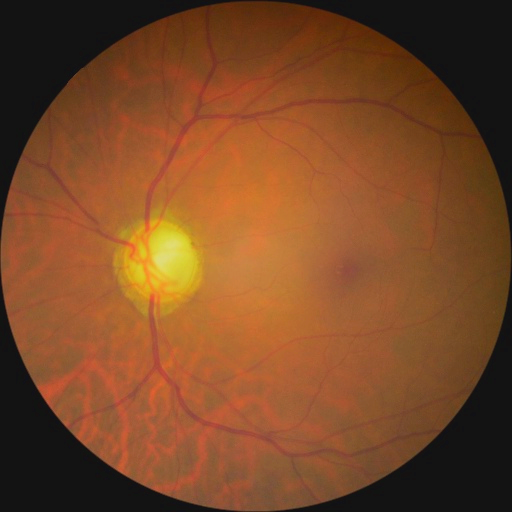

In [39]:
my_transform = transforms.Compose([
    transforms.ColorJitter(brightness=(0.5,1.5),contrast=(3),saturation=(0.8,2.1),hue=(-0.01,0.01)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToPILImage()
])
my_img = my_transform(image)
my_img

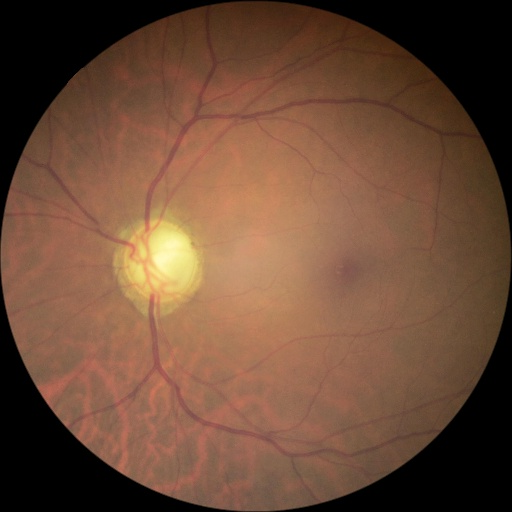

In [67]:
my_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToPILImage()
])
my_img = my_transform(image)
my_img

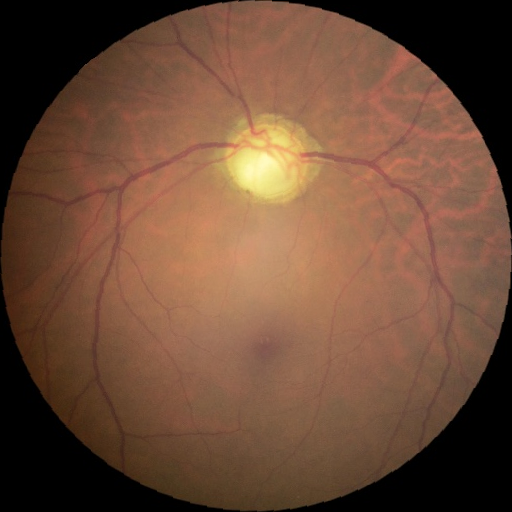

In [73]:

my_transform = transforms.Compose([
    transforms.RandomRotation(90), 
    # transforms.RandomHorizontalFlip(p=1),
    transforms.ToPILImage()
])
my_img = my_transform(image)
my_img


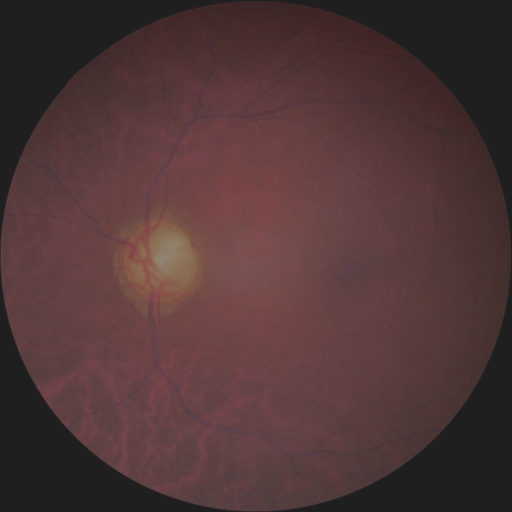

In [101]:
my_transform = transforms.Compose([
    transforms.ColorJitter(brightness=(2.5),contrast=(1.5),saturation=(0.8),hue=(-0.1,0.1)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToPILImage()
])
my_img = my_transform(image)
my_img


In [13]:
from typing import Any, Dict, Optional, Tuple
import torch
from lightning import LightningDataModule
from torch.utils.data import DataLoader, Dataset
import glob
import os
from torchvision.transforms import transforms
import torchvision
from tqdm import tqdm

root_dir = '/mnt/Enterprise2/shirshak/Glaucoma_Dataset_eyepacs_airogs_lightv2/eyepac-light-v2-512-jpg/'

train_data_paths = os.path.join(root_dir+"train/") # from train path
val_data_paths = os.path.join(root_dir+"validation/") # from validation path
test_data_paths = os.path.join(root_dir+"test/") # from test path

my_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # convert 0-255 to 0-1 and from np to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

data_train = torchvision.datasets.ImageFolder(train_data_paths, transform=my_transforms)
data_val = torchvision.datasets.ImageFolder(val_data_paths, transform=my_transforms)
data_test = torchvision.datasets.ImageFolder(test_data_paths, transform=my_transforms)


In [14]:
sum(data[1] == 0 for data in tqdm(data_train))

100%|██████████| 8000/8000 [00:28<00:00, 276.38it/s]


4000

In [15]:
sum(data[1] == 1 for data in tqdm(data_train))

100%|██████████| 8000/8000 [00:28<00:00, 282.57it/s]


4000